<p style="font-size: 50px; color: white; font-family: 'Comic Sans MS'; text-align: center; background-color: black; border-radius: 5px 5px;"><strong>Insurance Fraud Detection Project</strong></p>




<p style="font-size: 40px; color: green; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>Data Loading</strong>
</p>


In [158]:
#Importing libraries and imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [159]:
# Loading the Data and Inspecting Columns
data= r'C:\Users\st\Desktop\Aneaho insurane\insurance_claims (1).csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(data)

In [160]:
# Missing values are denoted by '?' so replace missing values with np.nan
df.replace('?',np.nan,inplace=True)

In [161]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

<p style="font-size: 40px; color: green; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>Data Pre-Processing</strong>
</p>

<p style="font-size: 30px; color: blue; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>1. Processing and Visualising Missing Values</strong>
</p>

In [163]:
#check missing or null or any values
print("Null Values: " + str(df.isnull().any().sum()))

Null Values: 5


In [164]:
# Identify missing Values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

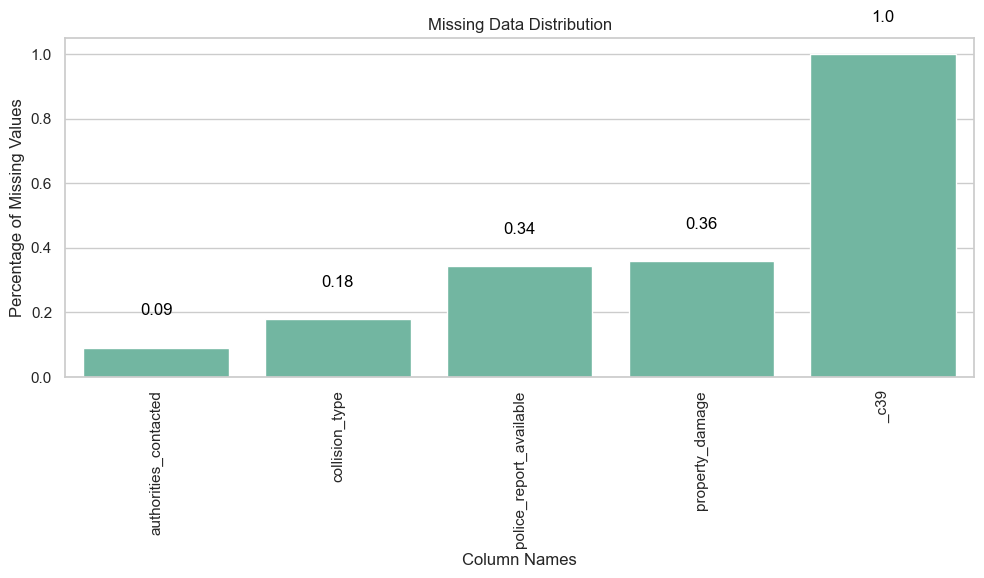

In [165]:
# Calculate missing values
missing = df.isnull().sum() / len(df)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing = missing.to_frame()
missing.columns = ['Null_Count']
missing.index.names = ['Col_Name']
missing = missing.reset_index()

# Plotting with annotations and custom colors
sns.set(style='whitegrid', palette='Set2')  # Set custom color palette
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Create bar plot
plot = sns.barplot(x='Col_Name', y='Null_Count', data=missing)

# Annotate bars with the number of missing values
for index, row in missing.iterrows():
    plot.text(index, row['Null_Count'] + 0.1, round(row['Null_Count'], 2), color='black', ha="center")

plt.xticks(rotation=90)
plt.title('Missing Data Distribution')
plt.xlabel('Column Names')
plt.ylabel('Percentage of Missing Values')
plt.tight_layout()
plt.show()

In [166]:
## Handling Missing Values in Specific Columns
df['collision_type']= df['collision_type'].fillna(df['collision_type'].mode([0]))
df['property_damage']= df['property_damage'].fillna(df['property_damage'].mode([0]))
df['police_report_available']= df['police_report_available'].fillna(df['police_report_available'].mode([0]))



In [167]:
# Selecting only numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])

In [168]:
# Computing the Correlation Matrix
corr = numeric_data.corr()


In [169]:
# Print the shape and type of the correlation matrix for debugging
print(type(corr))
print(corr.shape)
print(corr)

<class 'pandas.core.frame.DataFrame'>
(19, 19)
                             months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.

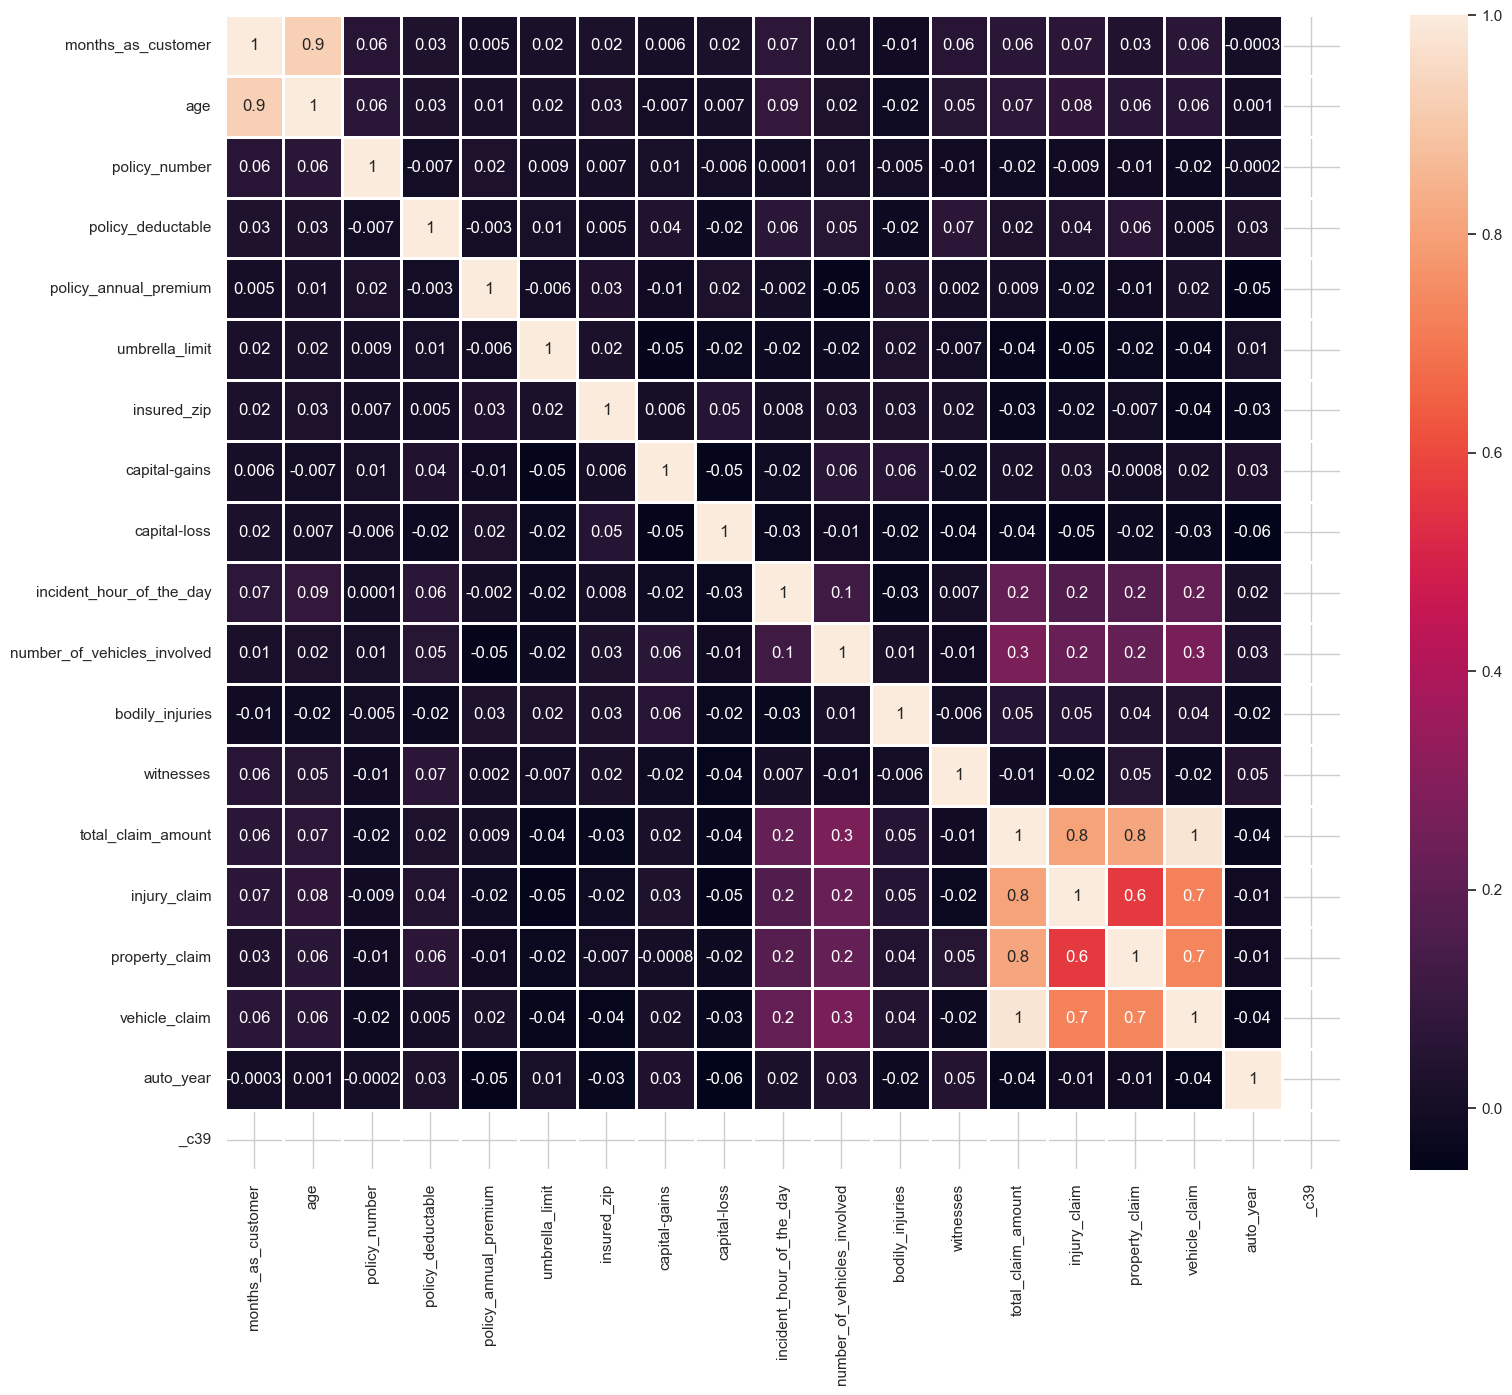

In [170]:
# Plotting the Heatmap for graphical representation of data where values in a matrix are represented as colors
# Each cell's color indicates the strength and direction of the correlation between two variables
plt.figure(figsize=(18, 15))
sns.heatmap(data=corr, annot=True, fmt='.1g', linewidths=2)
plt.show()

In [171]:
# Calculate number of unique values in each column
unique_counts = df.nunique()

# Display the number of unique values per column
print(unique_counts)

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

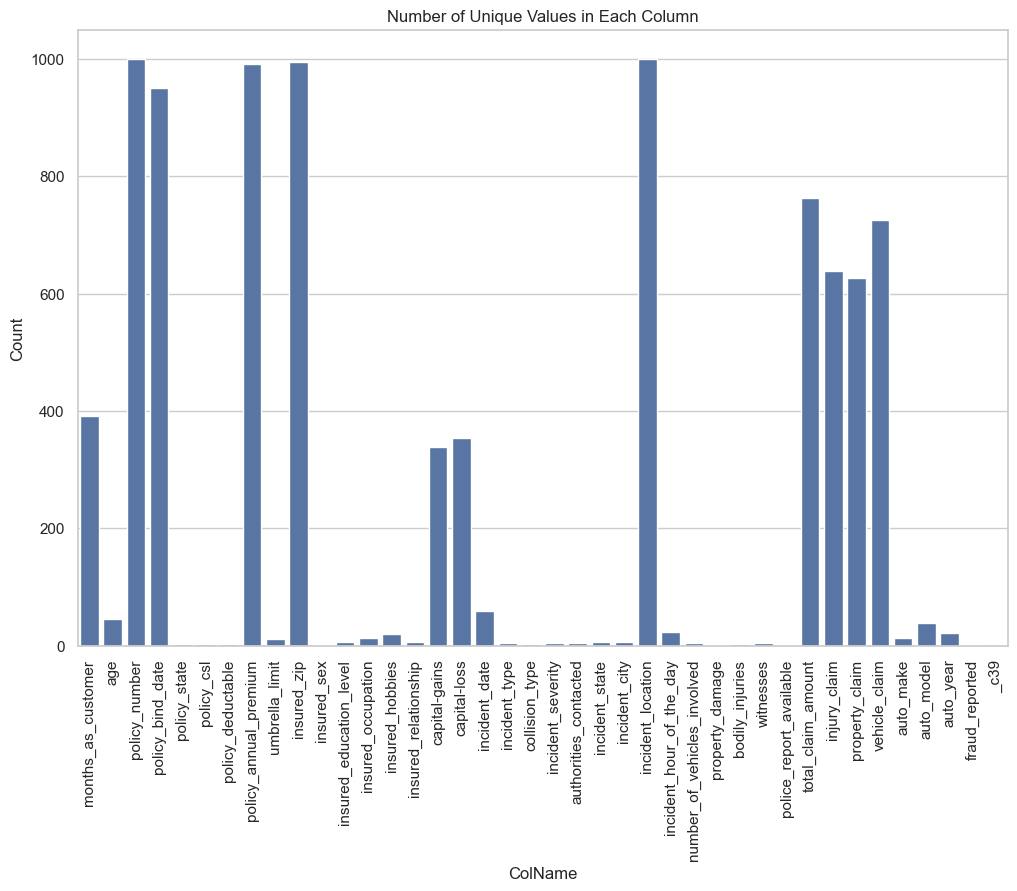

In [172]:
# Plotting number of unique values in each column using seaborn
unique_counts = df.nunique()

# Convert to DataFrame for plotting
unique_df = pd.DataFrame({'ColName': unique_counts.index, 'Count': unique_counts.values})

# Plotting
sns.set(style='whitegrid', color_codes=True)
plt.figure(figsize=(12, 8))
sns.barplot(x='ColName', y='Count', data=unique_df)
plt.xticks(rotation=90)
plt.title('Number of Unique Values in Each Column')
plt.show()

In [173]:
# Print the current columns of df to verify names
print(df.columns)

# Check for exact match in column names before dropping
to_drop = ['policy_number','policy_bind_date','policy_state', 'insured_zip', 'incident_location', 
           'incident_date', 'incident_state', 'incident_city', 'insured_hobbies', 'auto_make', 
           'auto_model', 'auto_year', '_c39']

# Verify each column exists in df.columns before dropping
columns_to_drop = [col for col in to_drop if col in df.columns]



Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')


In [174]:
# Drop columns which are not necessary for prediction 
# (These columns do not contain information that directly influences the prediction task (e.g., fraud detection, claims prediction).
df.drop(columns_to_drop, inplace=True, axis=1)

In [175]:
# Preview of dataFrame after dropping unnecessary columns
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [176]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])

In [177]:
# Compute the Correlation Matrix
corr = numeric_data.corr()

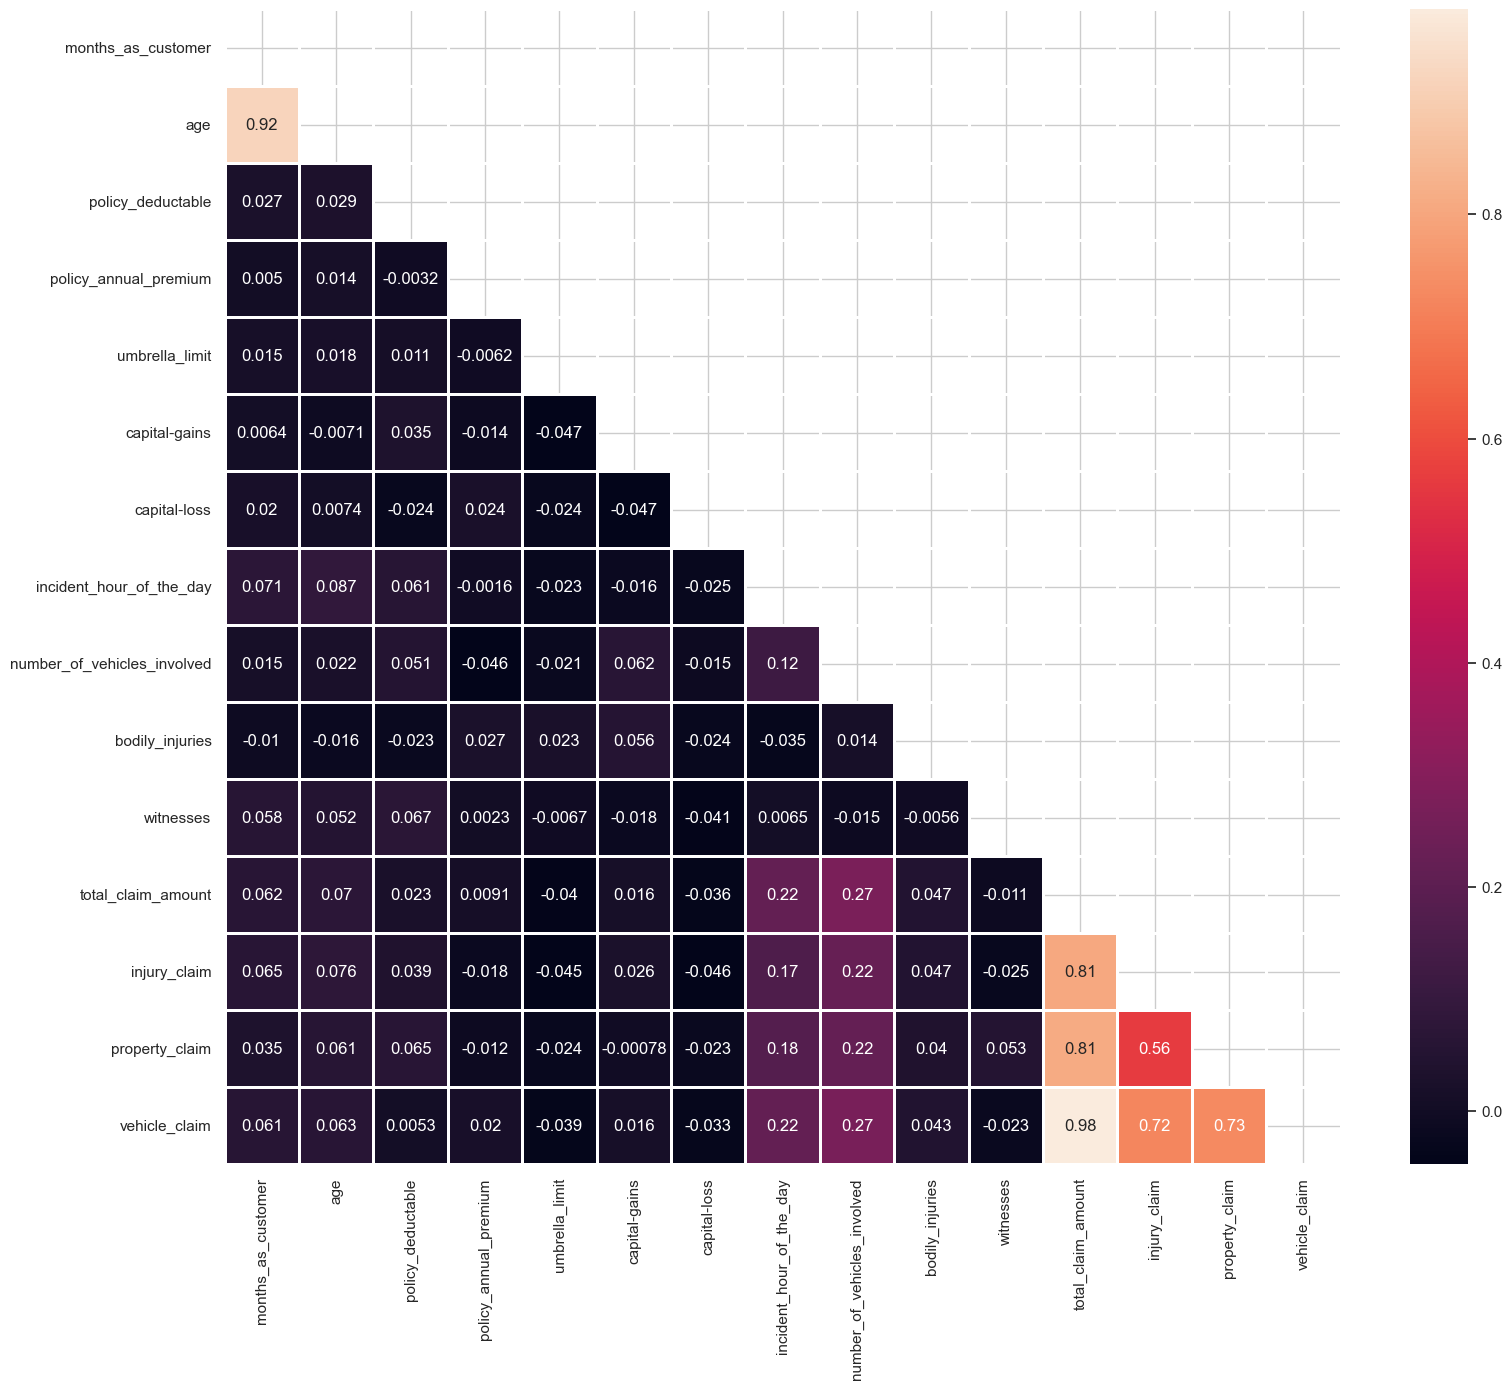

In [178]:
# Plot the heatmap to visualize multicollinearity
plt.figure(figsize=(18, 15))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data=corr, mask=mask, annot=True, fmt='.2g', linewidths=1)
plt.show()

In [179]:
# There is high correlation between `age` and `months_as_customer`. There is also high correlation between `total_clam_amount`, `injury_claim`, `property_claim`, `vehicle_claim` as total claim is the sum of all others. 
# We will therefore drop the 'age'and 'total_claim_amount' columns.
df.drop(columns=['age', 'total_claim_amount'],inplace=True,axis=1)

In [180]:
# Preview of dataFrame after dropping unnecessary columns
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NaN,0,0,NaN,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NaN,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [181]:
# Preview of dataFrame information after dropping unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               822 non-null    object 
 13  incident_severity  

<p style="font-size: 40px; color: green; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>Transforming Categorical Columns into Numerical Representation</strong>
</p>

In [182]:
# Seperate the feature and target columns

x = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [183]:
# Extract the categorical columns and show a preview
categorical_df = x.select_dtypes(include = ['object'])
categorical_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,NaN,Minor Damage,Police,NaN,NaN
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NaN,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,NaN,Minor Damage,NaN,NO,NO


In [184]:
# printing unique values of each column
for col in categorical_df.columns:
    print(f"{col}: \n{categorical_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' nan 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' nan 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' nan 'NO']

police_report_available: 
['YES' nan 'NO']



In [185]:
# convert categorical variables into a numerical format
categorical_df= pd.get_dummies(categorical_df, drop_first = True)
categorical_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [186]:
# Extract the numerical columns and show a preview
numerical_df = x.select_dtypes(include = ['int64'])
numerical_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [187]:
# Combine the numerical and categorical dataframes to get the final dataset and preview dataset
x = pd.concat([numerical_df, categorical_df], axis = 1)
x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,True,False,False,False,False,False,True,True,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,False,False,True,False,False,False,False,True,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,True,False,False,False,False,True,False,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,False,False,True,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,False,False,True,False,False,False,False,False,False,False


<p style="font-size: 40px; color: green; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>Check for Outliers</strong>
</p>

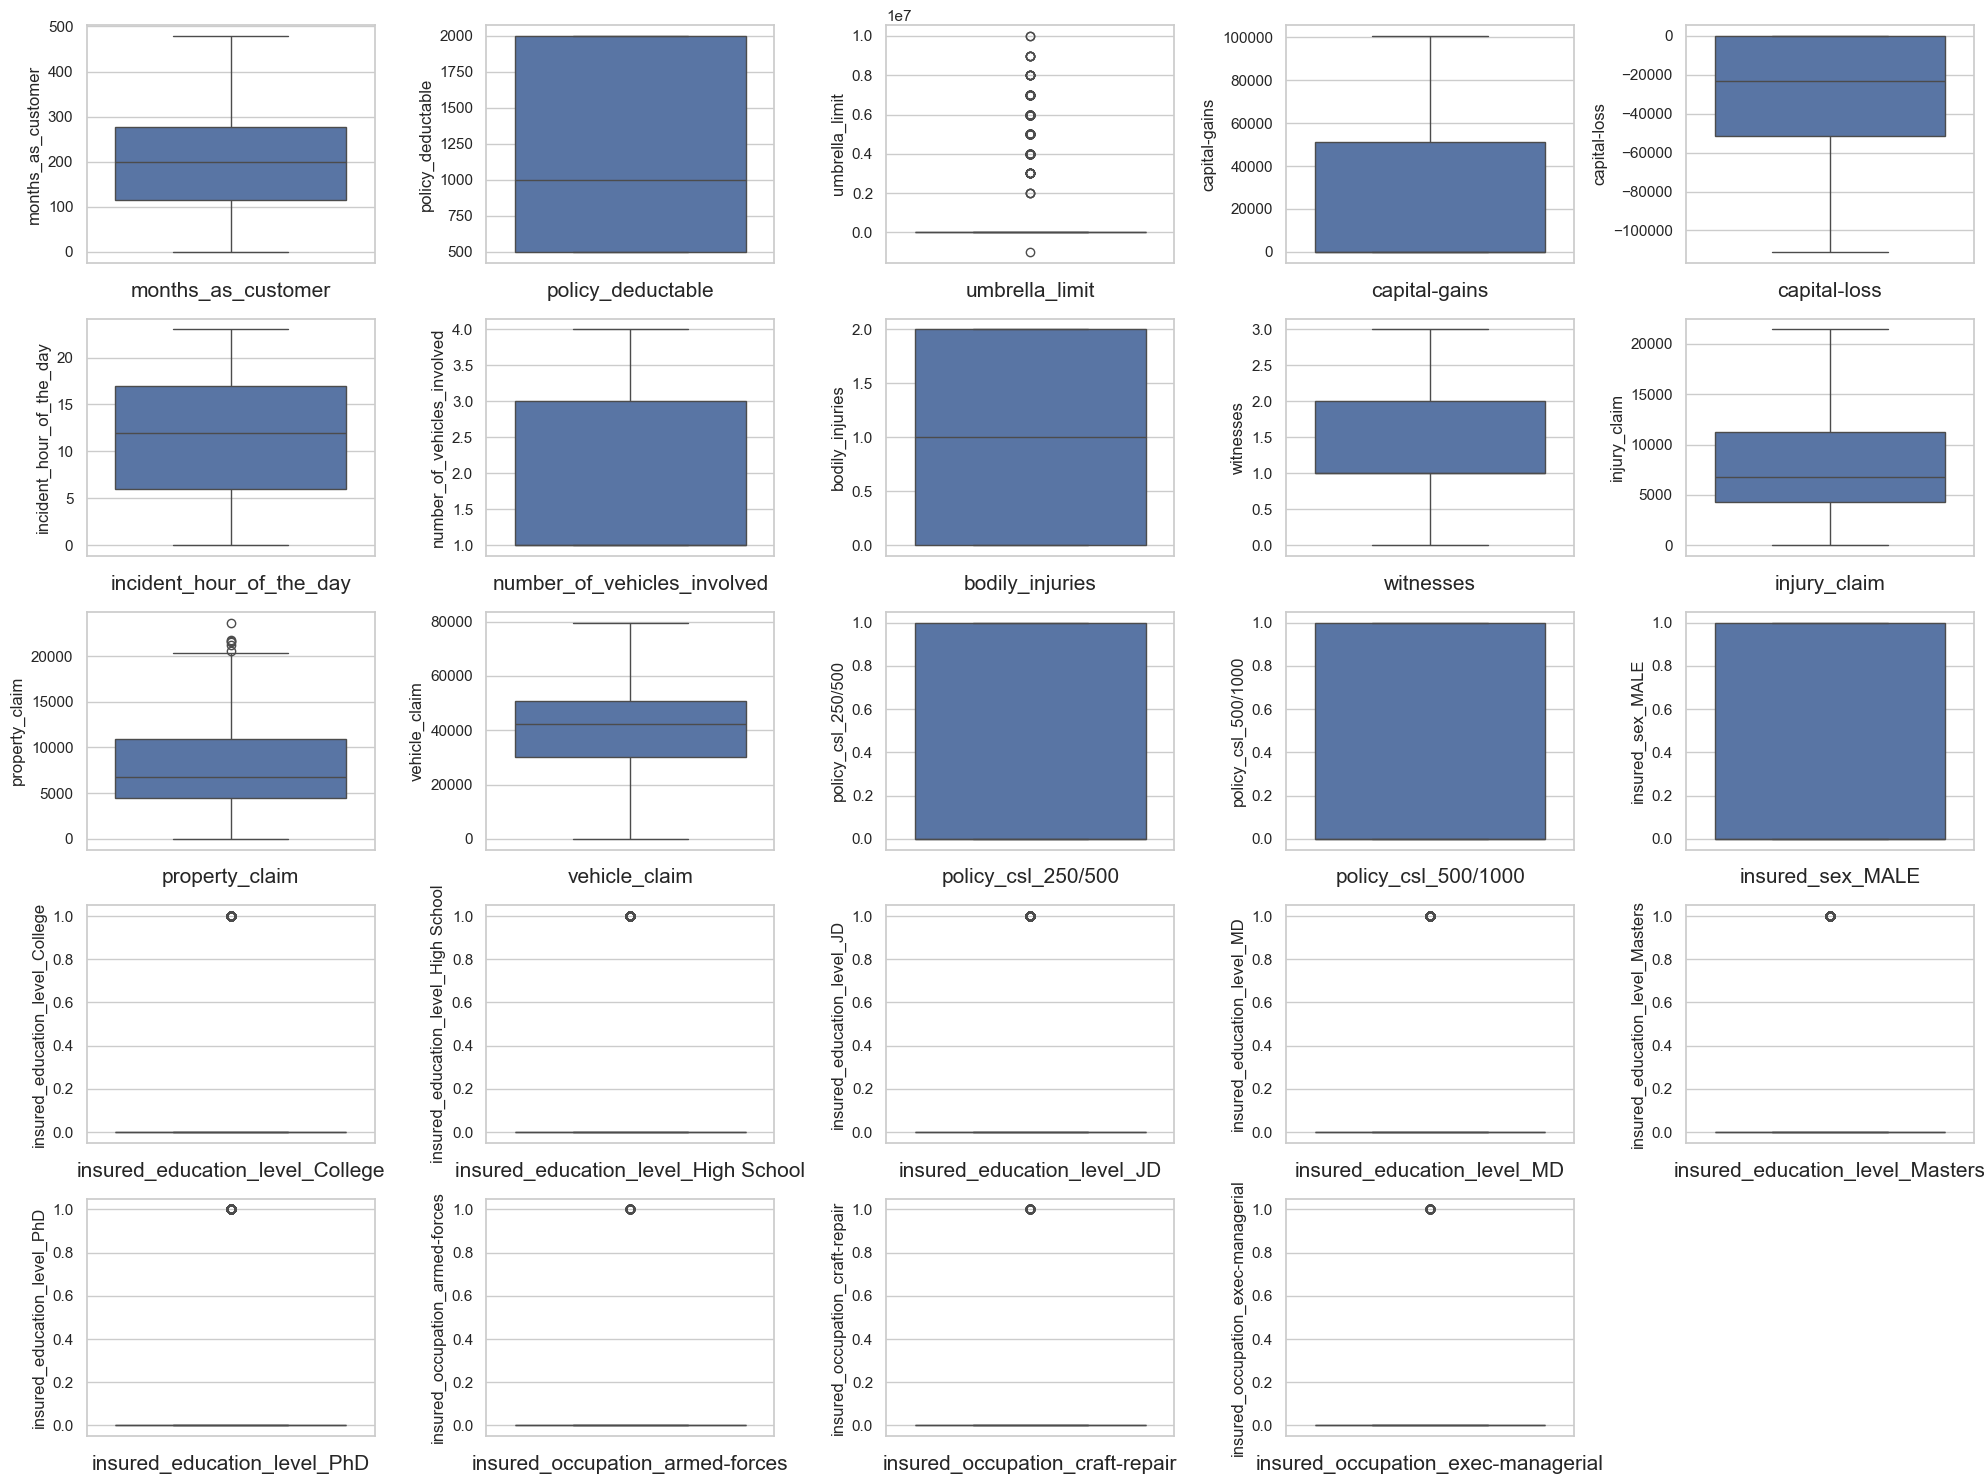

In [188]:
# Generate a series of box plots for each feature in the DataFrame x for visualizing the distribution, central tendency, and variability of the data, as well as for identifying outliers
plt.figure(figsize=(20,15))
plotnumber=1

for col in x.columns:
    if plotnumber <= 24:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [189]:
# Split data into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
918,180,500,0,0,0,7,3,2,1,12660,...,False,False,True,False,False,False,False,False,True,False
929,136,500,0,0,0,6,1,0,0,10000,...,False,True,False,False,False,False,False,True,True,False
953,229,2000,0,42600,-44400,3,1,1,0,420,...,False,False,True,False,False,False,False,False,False,True
427,91,1000,4000000,63600,0,19,1,1,0,6730,...,False,True,True,False,False,False,False,True,False,False
291,59,2000,0,64200,-32300,0,3,0,2,5730,...,False,False,False,True,False,False,False,False,False,False


In [190]:
#  Create a new DataFrame numerical_data by selecting specific columns from x_train
numerical_data=x_train[['months_as_customer', 'policy_deductable','umbrella_limit','capital-gains','capital-loss', 'incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','injury_claim','property_claim','vehicle_claim']]

In [191]:
#  Perform scaling on the numerical data 
scaler=StandardScaler()
scaled_data=scaler.fit_transform(numeric_data)

In [192]:
print("Shape of scaled_data:", scaled_data.shape)
print("Shape of numerical_data.columns:", numerical_data.columns.shape)
print("Shape of x_train.index:", x_train.index.shape)


Shape of scaled_data: (1000, 15)
Shape of numerical_data.columns: (12,)
Shape of x_train.index: (750,)


In [193]:
# Select numerical columns from x_train
numerical_data = x_train.select_dtypes(include=['float64', 'int64'])

# Fit and transform the scaler on numerical_data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Check the shapes again to ensure they match
print("Shape of x_train (after selecting numerical columns):", numerical_data.shape)
print("Shape of scaled_data (after scaling):", scaled_data.shape)

# Create DataFrame with scaled data
scaled_num_df = pd.DataFrame(data=scaled_data, columns=numerical_data.columns, index=x_train.index)
scaled_num_df.head()

Shape of x_train (after selecting numerical columns): (750, 12)
Shape of scaled_data (after scaling): (750, 12)


,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
918,-0.183755,-1.053421,-0.482943,-0.913844,0.962277,-0.645655,1.146540,1.237618,-0.457102,1.084397,-0.197066,0.695016
929,-0.564175,-1.053421,-0.482943,-0.913844,0.962277,-0.788837,-0.827984,-1.195444,-1.359277,0.542546,0.565493,-0.126894
953,0.239895,1.412965,-0.482943,0.632731,-0.615475,-1.218383,-0.827984,0.021087,-1.359277,-1.408931,-1.337787,-1.789631
427,-0.953241,-0.231292,1.233680,1.395127,0.962277,1.072529,-0.827984,0.021087,-1.359277,-0.123564,-0.113953,0.509508
291,-1.229911,1.412965,-0.482943,1.416910,-0.185502,-1.647929,1.146540,-1.195444,0.445073,-0.327267,0.868854,-0.159476


In [194]:
# Dropping Original Numerical Columns
x_train.drop(columns=scaled_num_df.columns,inplace=True)

In [195]:
# Concatenating Scaled Numerical Data
x_train=pd.concat([scaled_num_df,x_train],axis=1)

In [196]:
x_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
918,-0.183755,-1.053421,-0.482943,-0.913844,0.962277,-0.645655,1.146540,1.237618,-0.457102,1.084397,...,False,False,True,False,False,False,False,False,True,False
929,-0.564175,-1.053421,-0.482943,-0.913844,0.962277,-0.788837,-0.827984,-1.195444,-1.359277,0.542546,...,False,True,False,False,False,False,False,True,True,False
953,0.239895,1.412965,-0.482943,0.632731,-0.615475,-1.218383,-0.827984,0.021087,-1.359277,-1.408931,...,False,False,True,False,False,False,False,False,False,True
427,-0.953241,-0.231292,1.233680,1.395127,0.962277,1.072529,-0.827984,0.021087,-1.359277,-0.123564,...,False,True,True,False,False,False,False,True,False,False
291,-1.229911,1.412965,-0.482943,1.416910,-0.185502,-1.647929,1.146540,-1.195444,0.445073,-0.327267,...,False,False,False,True,False,False,False,False,False,False


<p style="font-size: 40px; color: green; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>Exploratory Data Analysis</strong>


<p style="font-size: 40px; color: green; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>Models</strong>
<p style="font-size: 30px; color: blue; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>1. Support Vector</strong>
</p>

In [197]:
# Train SVM and Predict
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train)

y_pred=svc_model.predict(x_test)

In [198]:
# Evaluate SVM Model Performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate training and testing accuracy
svc_model_train_acc = accuracy_score(y_train, svc_model.predict(x_train))
svc_model_test_acc = accuracy_score(y_test, y_pred)

# Print training and testing accuracy
print("Training Accuracy:", svc_model_train_acc)
print("Testing Accuracy:", svc_model_test_acc)

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

Training Accuracy: 0.8533333333333334
Testing Accuracy: 0.756
[[189   0]
 [ 61   0]]
              precision    recall  f1-score   support

           N       0.76      1.00      0.86       189
           Y       0.00      0.00      0.00        61

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.76      0.65       250



<p style="font-size: 30px; color: blue; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>2. K-Nearest Neighbors (KNN)</strong>
</p>

In [199]:
# K-Nearest Neighbors (KNN) Model Evaluation
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=30)
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [200]:
# Ensure x_test is C-contiguous
x_test = np.ascontiguousarray(x_test)

In [201]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure x_train and y_train are numpy arrays (or convert them if necessary)
x_train = np.array(x_train)
y_train = np.array(y_train)

# Ensure x_test is also converted to numpy array if it's not already
x_test = np.array(x_test)

# Fit the model if it's not already fitted
knn_model.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(x_test)

# Calculate accuracies and metrics
knn_model_train_acc = accuracy_score(y_train, knn_model.predict(x_train))
knn_model_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy:", knn_model_train_acc)
print("Testing Accuracy:", knn_model_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training Accuracy: 0.7533333333333333
Testing Accuracy: 0.756
[[189   0]
 [ 61   0]]
              precision    recall  f1-score   support

           N       0.76      1.00      0.86       189
           Y       0.00      0.00      0.00        61

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.76      0.65       250



<p style="font-size: 30px; color: blue; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>3. Decision Tree Classifier</strong>
</p>

In [202]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

In [203]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the Decision Tree model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Predict the labels on the test set
y_pred = dtc.predict(x_test)

# Compute and print training and testing accuracy scores
dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is: {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is: {dtc_test_acc}")

# Compute and print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training accuracy of Decision Tree is: 1.0
Test accuracy of Decision Tree is: 0.488
[[108  81]
 [ 47  14]]
              precision    recall  f1-score   support

           N       0.70      0.57      0.63       189
           Y       0.15      0.23      0.18        61

    accuracy                           0.49       250
   macro avg       0.42      0.40      0.40       250
weighted avg       0.56      0.49      0.52       250



In [204]:
# Create a new Decision Tree model for Grid Search
dtc = DecisionTreeClassifier()

# Define the grid parameters
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': range(2, 10, 1),
    'min_samples_leaf': range(2, 10, 1)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dtc, grid_params, cv=5, n_jobs=-1, verbose=1)

# Perform Grid Search
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [205]:
# Best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2}
0.8133333333333332


In [206]:
# Best estimator 
decision_tree_model=grid_search.best_estimator_
y_pred=decision_tree_model.predict(x_test)

In [207]:
# Compute and print training and testing accuracy scores, confusion matrix, and classification report

decision_tree_model_train_acc=accuracy_score(y_train,decision_tree_model.predict(x_train))
decision_tree_model_test_acc=accuracy_score(y_test,y_pred)

print(f"Training accuracy of Decision Tree is:{decision_tree_model_train_acc}")
print(f"Test accuracy of Decision Tree is:{decision_tree_model_test_acc} ")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Decision Tree is:0.8146666666666667
Test accuracy of Decision Tree is:0.8 
[[157  32]
 [ 18  43]]
              precision    recall  f1-score   support

           N       0.90      0.83      0.86       189
           Y       0.57      0.70      0.63        61

    accuracy                           0.80       250
   macro avg       0.74      0.77      0.75       250
weighted avg       0.82      0.80      0.81       250



<p style="font-size: 30px; color: blue; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>4. Random Forest Classifier</strong>
</p>

In [208]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(x_train, y_train)

y_pred = rand_clf.predict(x_test)

In [209]:
# Compute and print training and testing accuracy scores, confusion matrix, and classification report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(x_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9706666666666667
Test accuracy of Random Forest is : 0.808
[[172  17]
 [ 31  30]]
              precision    recall  f1-score   support

           N       0.85      0.91      0.88       189
           Y       0.64      0.49      0.56        61

    accuracy                           0.81       250
   macro avg       0.74      0.70      0.72       250
weighted avg       0.80      0.81      0.80       250



<p style="font-size: 30px; color: blue; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>5. Gradient Boosting Classifier</strong>
</p>

In [210]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

# Compute and print training and testing accuracy scores, confusion matrix, and classification report

gb_acc = accuracy_score(y_test, gb.predict(x_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(x_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(x_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.932
Test Accuracy of Gradient Boosting Classifier is 0.616 

Confusion Matrix :- 
[[99 90]
 [ 6 55]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.94      0.52      0.67       189
           Y       0.38      0.90      0.53        61

    accuracy                           0.62       250
   macro avg       0.66      0.71      0.60       250
weighted avg       0.81      0.62      0.64       250



<p style="font-size: 30px; color: blue; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>6. Stochastic Gradient Boosting Classifier</strong>
</p>

In [211]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(x_train, y_train)

#Compute accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(x_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(x_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(x_test))}")

Training Accuracy of Stochastic Gradient Boosting is 0.9293333333333333
Test Accuracy of Stochastic Gradient Boosting is 0.672 

Confusion Matrix :- 
[[118  71]
 [ 11  50]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.91      0.62      0.74       189
           Y       0.41      0.82      0.55        61

    accuracy                           0.67       250
   macro avg       0.66      0.72      0.65       250
weighted avg       0.79      0.67      0.70       250



<p style="font-size: 30px; color: blue; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>7. Extra Trees Classifier</strong>
</p>

In [212]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(x_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(x_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(x_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.772 

Confusion Matrix :- 
[[178  11]
 [ 46  15]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.79      0.94      0.86       189
           Y       0.58      0.25      0.34        61

    accuracy                           0.77       250
   macro avg       0.69      0.59      0.60       250
weighted avg       0.74      0.77      0.74       250



<p style="font-size: 30px; color: blue; font-family: 'Comic Sans MS'; text-align: center; background-color: white; border-radius: 5px 5px;">
    <strong>8. Voting Classifier</strong>
</p>

In [213]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc_model), ('KNN', knn_model),  ('Decision Tree', dtc), ('Random Forest', rand_clf),
              ('Gradient Boosting Classifier', gb), ('SGB', sgb), ('Extra Trees Classifier', etc)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(x_train, y_train)

y_pred = vc.predict(x_test)

In [214]:
# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(x_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.9493333333333334
Test accuracy of Voting Classifier is : 0.768
[[181   8]
 [ 50  11]]
              precision    recall  f1-score   support

           N       0.78      0.96      0.86       189
           Y       0.58      0.18      0.28        61

    accuracy                           0.77       250
   macro avg       0.68      0.57      0.57       250
weighted avg       0.73      0.77      0.72       250



In [215]:
models = pd.DataFrame({
    'Model' : ['svc_model', 'knn_model', 'dtc', 'Random Forest','Gradient Boost', 'SGB', 'Extra Trees', 'Voting Classifier'],
    'Score' : [svc_model_test_acc, knn_model_test_acc, dtc_test_acc, rand_clf_test_acc, gb_acc, sgb_acc, etc_acc,vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,0.808
6,Extra Trees,0.772
7,Voting Classifier,0.768
0,svc_model,0.756
1,knn_model,0.756
5,SGB,0.672
4,Gradient Boost,0.616
2,dtc,0.488


In [216]:
import plotly.express as px

px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')